In [1]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()

figure有一些选项，figsize 大小和纵横比

In [2]:
# 获取当前figure的引用
# plt.gcf()

In [3]:
# figure不能直接绘图，绘图需要用add_subplot创建一个或多个subplot才行
# 在两行两列的四个ax中，选中第一个（变号从1开始）
ax1 = fig.add_subplot(221)
ax1.plot([1,2,3],[1,2,3])
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
# 此时发出绘图命令，就会在最后一个用过的subplot中绘图
ax3.plot(np.random.randn(50).cumsum(),'k--')
plt.show()


k-- 是一个线性选项，告诉plt 绘制黑色虚线，fig.add_subplot返回的是axessubplot对象

直接调用其实例方法就可以在其表示的格子中画图了

In [4]:
ax1.hist(np.random.randn(100),bins=10,color='k',alpha=0.3)

(array([ 2.,  7.,  8.,  8., 17., 17., 16., 11.,  8.,  6.]),
 array([-2.19638828, -1.77191318, -1.34743809, -0.922963  , -0.49848791,
        -0.07401282,  0.35046227,  0.77493736,  1.19941245,  1.62388755,
         2.04836264]),
 <a list of 10 Patch objects>)

In [5]:
ax2.scatter(np.arange(30),np.arange(30)+3*np.random.randn(30))
plt.show()

根据特定的布局创建figure 和 subplot 是一个非常常见的任务，于是出现了一个更为方便的方法 plt.subplts,可以创建一个新的figure，返回一个还有已创建的subplot对象的numpy数组

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F84A9EE80>,
      dtype=object)

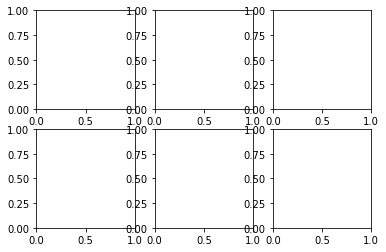

In [6]:
fig,axes = plt.subplots(2,3)
axes

In [7]:
# 可通过axes[i,j]获取目标axes
axes[1,1]

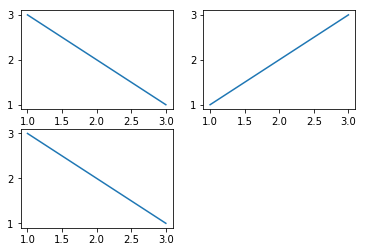

In [8]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax1.plot([1,2,3],[3,2,1])
ax2 = fig.add_subplot(222)
ax2.plot([1,2,3],[1,2,3])
ax3 = fig.add_subplot(223)
ax3.plot([1,2,3],[3,2,1])
plt.show()

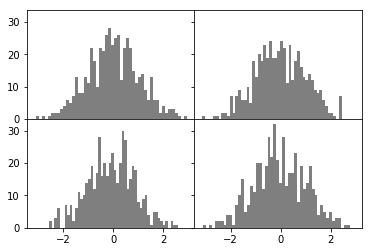

In [9]:
# wspach和hspace是控制高度和宽度的百分比，用作subplot之间的间距
# 下面将间距收到0
fig, axes = plt.subplots(2,2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500),bins=50,color='k',alpha=0.5)
plt.subplots_adjust(wspace=0,hspace=0)

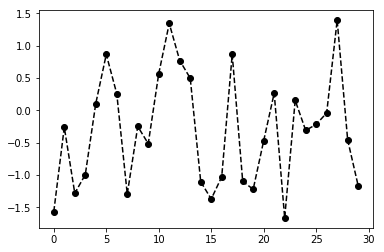

In [10]:
plt.plot(np.random.randn(30),color='k', linestyle='dashed', marker='o')

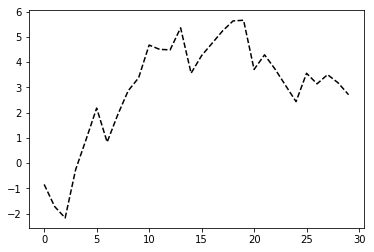

In [11]:
data = np.random.randn(30).cumsum()
plt.plot(data,'k--', label='Default')

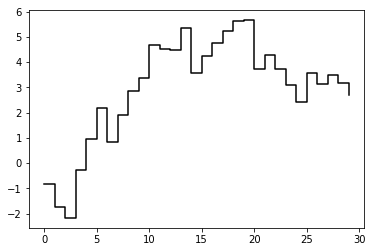

In [12]:
plt.plot(data,'k-', drawstyle='steps-post')

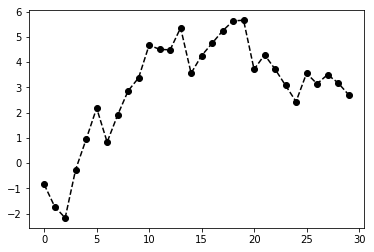

In [13]:
plt.plot(data,color='k', linestyle='dashed', marker='o')

(0.0, 1.0)

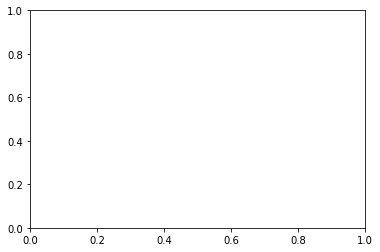

In [14]:
plt.xlim()

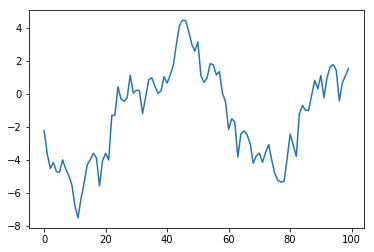

In [15]:
fig = plt.figure();ax = fig.add_subplot(1,1,1)
# 在坐标轴上绘图
ax.plot(np.random.randn(100).cumsum())

要修改x轴的刻度，最简单的办法是使用set_xticks和set_xticklabels

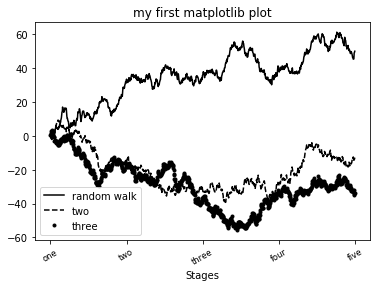

In [16]:
# 创建一个随机漫步
# 创建画板
fig = plt.figure()
# 创建绘图区
ax = fig.add_subplot(1,1,1)
# 设置刻度值
ticks = ax.set_xticks([0,250,500,750,1000])
# 设置刻度值对应表示
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                           rotation=30, fontsize='small')
# 设置标题
ax.set_title('my first matplotlib plot')
# 设置x轴标签
ax.set_xlabel('Stages')
# label是对应图线的标签，后面需要添加legend函数才能显示出来
ax.plot(np.random.randn(1000).cumsum(),'k',label='random walk')
# ax.legend()或plt.legend()


ax.plot(np.random.randn(1000).cumsum(),'k--',label='two')

ax.plot(np.random.randn(1000).cumsum(),'k.',label='three')


ax.legend()

(600, 1800)

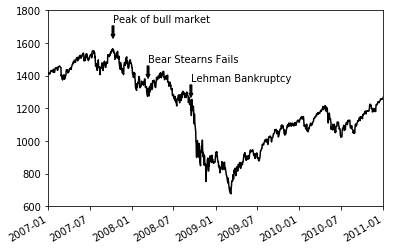

In [17]:
from datetime import datetime
import pandas as pd


fig = plt.figure()
ax = fig.add_subplot(111)




data = pd.read_csv('./spx.csv',index_col=0,parse_dates=True)
spx = data['SPX']



crisis_data = [(datetime(2007, 10, 11), 'Peak of bull market'),
               (datetime(2008, 3, 12), 'Bear Stearns Fails'),
               (datetime(2008, 9, 15), 'Lehman Bankruptcy') ]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,headlength=4),
                horizontalalignment='left', verticalalignment='top')
    


    
    
    
spx.plot(ax=ax,style='k-')

# 轴的缩放需放在绘图函数之后
# Zoom in on 2007-2010 
ax.set_xlim(['1/1/2007', '1/1/2011']) 
ax.set_ylim([600, 1800])

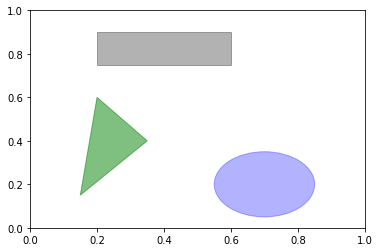

In [18]:
fig = plt.figure() 
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3) 
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],color='g', alpha=0.5)

ax.add_patch(rect) 
ax.add_patch(circ) 
ax.add_patch(pgon)

In [19]:
# 将图表保存到文件
# 利用plt.savefig 可将当前图表保存到文件
# 该方法相当于figure实例方法 savefig
# 例：将图表保存为svg图形
plt.savefig('./fig_test.jpg')

<Figure size 432x288 with 0 Axes>

In [20]:
fig.savefig('./fig_test.jpg')

pandas绘图

In [21]:
import pandas as pd

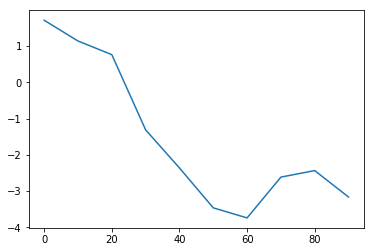

In [22]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0,100,10))
#  Series object’s index is passed to matplotlib for plotting on the x-axis
#  disable this by passing use_index=False
s.plot()

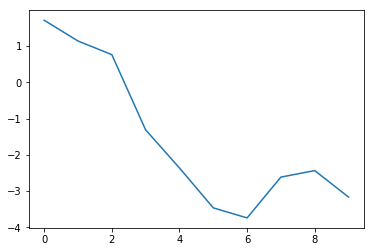

In [23]:
s.plot(use_index=False)

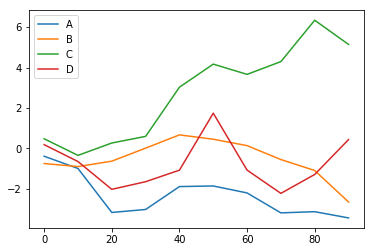

In [24]:
df = pd.DataFrame(np.random.randn(10,4).cumsum(0),
                 columns=['A','B','C','D'],
                 index=np.arange(0,100,10))
df.plot()

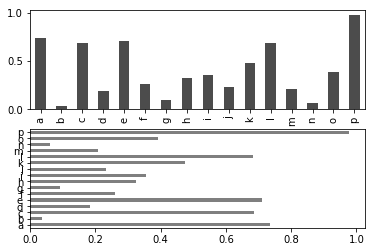

In [25]:
fig,axes = plt.subplots(2,1)
data = pd.Series(np.random.rand(16),index=list('abcdefghijklmnop'))
data.plot.bar(ax = axes[0], color='k', alpha=0.7)
data.plot.barh(ax = axes[1], color='k', alpha=0.5)

In [26]:
data

a    0.735666
b    0.037415
c    0.687076
d    0.184372
e    0.710724
f    0.261175
g    0.091107
h    0.324277
i    0.354814
j    0.231863
k    0.474405
l    0.682959
m    0.207490
n    0.061146
o    0.390787
p    0.977162
dtype: float64

In [27]:
df = pd.DataFrame(np.random.rand(6,4),
                 index = ['one', 'two', 'three', 'four', 'five', 'six'],
                 columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.616135,0.966666,0.855214,0.643990
two,0.398875,0.585160,0.858125,0.814645
three,0.967585,0.446351,0.248107,0.234548
four,0.367496,0.564111,0.673412,0.476413
five,0.997202,0.615320,0.745375,0.093718
six,0.321999,0.746500,0.364584,0.647829


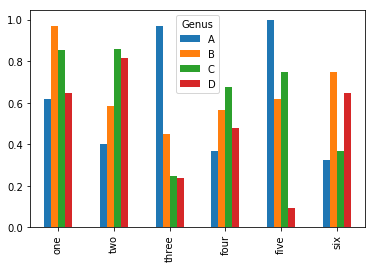

In [28]:
df.plot.bar()

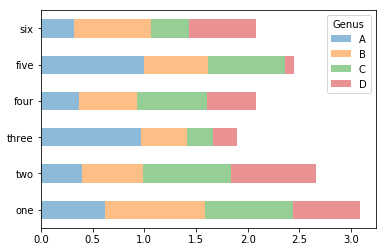

In [29]:
df.plot.barh(stacked=True,alpha=0.5)

In [30]:
tips = pd.read_csv('./tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [31]:
party_counts = pd.crosstab(tips['day'],tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


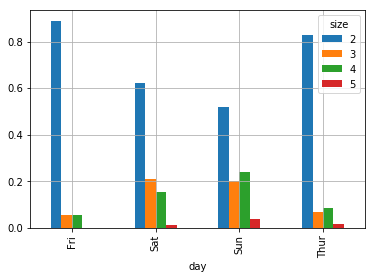

In [32]:
party_counts = party_counts.loc[:,2:5]
party_pcts = party_counts.div(party_counts.sum(1),axis=0)
party_pcts.plot.bar(grid=True)

In [33]:
import seaborn as sns

In [34]:
tips['tip_pct'] = tips['tip']/(tips['total_bill']-tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


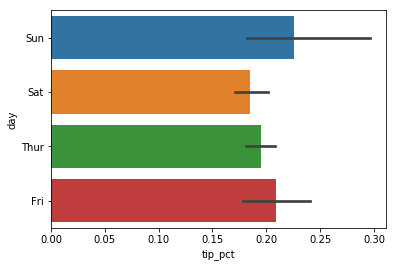

In [35]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


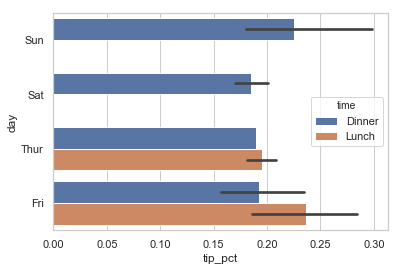

In [36]:
# You can switch between different plot appearances using seaborn.set
sns.set(style='whitegrid')


# seaborn.barplot has a hue option that enables us to split by an additional categorical value
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

In [37]:
tips

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069
5,25.29,4.71,No,Sun,Dinner,4,0.228863
6,8.77,2.00,No,Sun,Dinner,2,0.295421
7,26.88,3.12,No,Sun,Dinner,4,0.131313
8,15.04,1.96,No,Sun,Dinner,2,0.149847
9,14.78,3.23,No,Sun,Dinner,2,0.279654


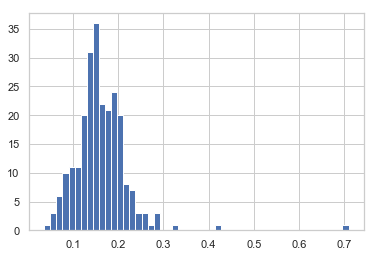

In [38]:
tips['tip_pct'] = tips['tip']/tips['total_bill']
tips['tip_pct'].hist(bins=50)

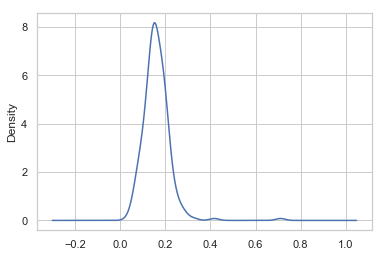

In [39]:
# 密度图是通过计算“可能会产生观测数据的连续概率分布的估计”而产生的，一般的过程是将该分布近似为一组核（诸如正态分布之类的较为简单的分布）
# 因此密度图也被称为KDE图（Kernel Density Estimate 核密度估计）
# 调用plot时加上kind='kde'即可生成一张密度图（标准混合正态分布KDE）
tips['tip_pct'].plot(kind='kde')

C:\Users\Dell\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


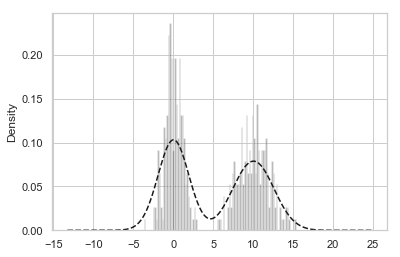

In [40]:
# (Gaussian) distribution
# 参数1 Mean ("centre") of the distribution.
# 参数2 Standard deviation (spread or "width") of the distribution.
comp1 = np.random.normal(0,1,size=200)
comp2 = np.random.normal(10,2,size=200)

values = pd.Series(np.concatenate([comp1,comp2]))
values.hist(bins=100,alpha=0.3,color='k',normed=True)
values.plot(kind='kde',style='k--')

In [42]:
macro = pd.read_csv('./macrodata.csv')
macro.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [45]:
data = macro[['cpi', 'm1','tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5,1,'Changes in log m1 vs.log unemp')

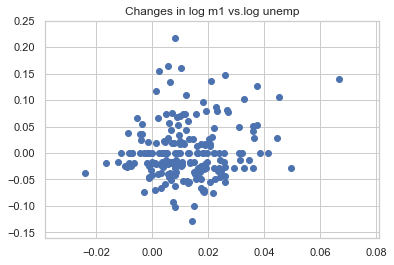

In [48]:
plt.scatter(trans_data['m1'],trans_data['unemp'])
plt.title('Changes in log %s vs.log %s' %('m1','unemp'))

In [55]:
data = pd.read_csv('../datasets/haiti/Haiti.csv')
data

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO
1,4051,"Food-Aid sent to Fondwa, Haiti",28/06/2010 23:06,fondwa,Please help food-aid.org deliver more food to ...,"1. Urgences | Emergency, 2. Urgences logistiqu...",50.226029,5.729886,NO,NO
2,4050,how haiti is right now and how it was during t...,24/06/2010 16:21,centrie,i feel so bad for you i know i am supposed to ...,"2. Urgences logistiques | Vital Lines, 8. Autr...",22.278381,114.174287,NO,NO
3,4049,Lost person,20/06/2010 21:59,Genoca,We are family members of Juan Antonio Zuniga O...,"1. Urgences | Emergency,",44.407062,8.933989,NO,NO
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO
5,4041,Radio Commerce in Sarthe,26/04/2010 13:14,"Radio Commerce Shelter, Sarthe",i'm Louinel from Sarthe. I'd to know what can ...,"5e. Communication lines down,",18.593707,-72.310079,YES,NO
6,4040,Contaminated water in Baraderes.,26/04/2010 14:19,Marc near Baraderes,How do we treat water in areas without Pipe?\t...,"4. Menaces | Security Threats, 4e. Assainissem...",18.482800,-73.638800,YES,NO
7,4039,Violence at &quot;arcahaie bas Saint-Ard&quot;,26/04/2010 14:27,unable to find &quot;arcahaie bas Saint-Ard&qu...,Goodnight at (arcahaie bas Saint-Ard) 2 young ...,"4. Menaces | Security Threats,",18.415000,-73.195000,YES,NO
8,4038,No electricity in pernier,15/03/2010 10:58,Pernier,why the people who lives in pernier doesn't fi...,"2. Urgences logistiques | Vital Lines, 2f. San...",18.517443,-72.236841,YES,NO
9,4037,Shelter and food needed at Lamentin 54 and Rue...,15/03/2010 11:00,Intersection of Lamentin 54 and Rue St Juste,"GOOD EVENING ONG, I'M VERY HAPPY FOR THE AID Y...","2. Urgences logistiques | Vital Lines, 2d. Ref...",18.547790,-72.410010,YES,NO


In [58]:
data.describe()

,Serial,LATITUDE,LONGITUDE
count,3593.000000,3593.000000,3593.000000
mean,2080.277484,18.611495,-72.322680
std,1171.100360,0.738572,3.650776
min,4.000000,18.041313,-74.452757
25%,1074.000000,18.524070,-72.417500
50%,2163.000000,18.539269,-72.335000
75%,3088.000000,18.561820,-72.293570
max,4052.000000,50.226029,114.174287
